Author: *Davide Cittaro*   
First compiled: *February 9, 2018.*

## Cell-Cycle Scoring and Regression

This is a _Scanpy_ demo that shows how to regress cell cycle effect, following the approach showed in [Seurat's vignette](http://satijalab.org/seurat/cell_cycle_vignette.html#assign-cell-cycle-scores). As for the R example, toy dataset consists of murine hematopoietic progenitors from [Nestorowa et al., Blood 2016](https://doi.org/10.1182/blood-2016-05-716480). The files of the Seurat tutorial - used here for reasons of benchmarking - can be downloaded [here](https://www.dropbox.com/s/3dby3bjsaf5arrw/cell_cycle_vignette_files.zip?dl=1). A more recent version of the dataset can be downloaded [here](http://blood.stemcells.cam.ac.uk/data/nestorowa_corrected_log2_transformed_counts.txt.gz).

In [1]:
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
import numpy as np

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(
    dpi=80
)  # low dpi (dots per inch) yields small inline figures
import pandas as pd

# Load data

In [2]:
pseudobulk = ad.read_h5ad(
    "/Users/lerastepanova/Documents/bioinf/Project_YUR/pseudobulk_combined.h5ad"
)

In [ ]:
# Select tumor data
normal = pseudobulk[pseudobulk.obs["cnv_status"] == "tumor"]

In [14]:
normal.obs["dataset"].unique()

['35', '109', '102', '67', '46', ..., 'br_GSE161529', 'br_GSE176078', 'mel_uv_GSE138433', 'mel_uv_GSE139829', 'mel_uv_GSE176029']
Length: 44
Categories (44, object): ['0', '2', '15', '19', ..., 'pdac_GSE155698', 'pdac_GSE156405', 'pdac_GSE214295', 'pdac_PRJCA001063']

Load cell cycle genes defined in [Tirosh et al, 2015](https://doi.org/10.1126/science.aad0501). It is a list of 97 genes, represented by their gene symbol. The list here is for humans, in case of alternate organism, a list of ortologues should be compiled.
There are major differences in the way _Scanpy_ and _Seurat_ manage data, in particular we need to filter out cell cycle genes that are not present in our dataset to avoid errors.

In [64]:
cell_cycle_genes = [
    x.strip()
    for x in open("./cell_cycle_vignette_files/regev_lab_cell_cycle_genes.txt")
]

Here we define two lists, genes associated to the S phase and genes associated to the G2M phase

In [65]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [
    "MCM5",
    "PCNA",
    "TYMS",
    "FEN1",
    "MCM2",
    "MCM4",
    "RRM1",
    "UNG",
    "GINS2",
    "MCM6",
    "CDCA7",
    "DTL",
    "PRIM1",
    "UHRF1",
    "HELLS",
    "RFC2",
    "RPA2",
    "NASP",
    "RAD51AP1",
    "GMNN",
    "WDR76",
    "SLBP",
    "CCNE2",
    "UBR7",
    "POLD3",
    "MSH2",
    "ATAD2",
    "RAD51",
    "RRM2",
    "CDC45",
    "CDC6",
    "EXO1",
    "TIPIN",
    "DSCC1",
    "BLM",
    "CASP8AP2",
    "USP1",
    "CLSPN",
    "POLA1",
    "CHAF1B",
    "BRIP1",
    "E2F8",
    "HMGB2",
    "CDK1",
    "NUSAP1",
    "UBE2C",
    "BIRC5",
    "TPX2",
    "TOP2A",
    "NDC80",
    "CKS2",
    "NUF2",
    "CKS1B",
    "MKI67",
    "TMPO",
    "CENPF",
    "TACC3",
    "SMC4",
    "CCNB2",
    "CKAP2L",
    "CKAP2",
    "AURKB",
    "BUB1",
    "KIF11",
    "ANP32E",
    "TUBB4B",
    "GTSE1",
    "KIF20B",
    "HJURP",
    "CDCA3",
    "CDC20",
    "TTK",
    "CDC25C",
    "KIF2C",
    "RANGAP1",
    "NCAPD2",
    "DLGAP5",
    "CDCA2",
    "CDCA8",
    "ECT2",
    "KIF23",
    "HMMR",
    "AURKA",
    "PSRC1",
    "ANLN",
    "LBR",
    "CKAP5",
    "CENPE",
    "CTCF",
    "NEK2",
    "G2E3",
    "GAS2L3",
    "CBX5",
    "CENPA",
]

In [ ]:
sc.tl.score_genes_cell_cycle(
    pseudobulk,
    s_genes=s_genes,
    g2m_genes=g2m_genes,
    copy=False,  # if you want to change AnnData object
)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    387 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    386 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


In [67]:
pseudobulk.obs

,Sample,final_cell_annotation,dataset,cnv_status,source,S_score,G2M_score,phase
GSM4450727_96_Skin Normal_Melanocyte,GSM4450727,96_Skin Normal_Melanocyte,65,normal,mel,-0.019336,-0.168241,G1
GSM4450728_96_Skin Normal_Melanocyte,GSM4450728,96_Skin Normal_Melanocyte,65,normal,mel,-0.068114,-0.243238,G1
GSM4450729_96_Skin Normal_Melanocyte,GSM4450729,96_Skin Normal_Melanocyte,65,normal,mel,-0.116987,-0.179304,G1
GSM5410886_96_Skin Normal_Melanocyte,GSM5410886,96_Skin Normal_Melanocyte,8,normal,mel,-0.074839,-0.184486,G1
GSM5410888_96_Skin Normal_Melanocyte,GSM5410888,96_Skin Normal_Melanocyte,8,normal,mel,-0.125185,-0.163846,G1
...,...,...,...,...,...,...,...,...
GSM4147099_UVM,GSM4147099,UVM,mel_uv_GSE139829,tumor,uvm,-0.082422,-0.191675,G1
GSM4147100_UVM,GSM4147100,UVM,mel_uv_GSE139829,tumor,uvm,-0.138303,-0.224846,G1
GSM4147101_UVM,GSM4147101,UVM,mel_uv_GSE139829,tumor,uvm,-0.033447,-0.158644,G1
GSM5353203_UVM,GSM5353203,UVM,mel_uv_GSE176029,tumor,uvm,-0.062188,-0.193083,G1


Standard filters applied. Note that we do not extract variable genes and work on the whole dataset, instead. This is because, for this demo, almost 70 cell cycle genes would not be scored as variable. Cell cycle scoring on ~20 genes is ineffective. 

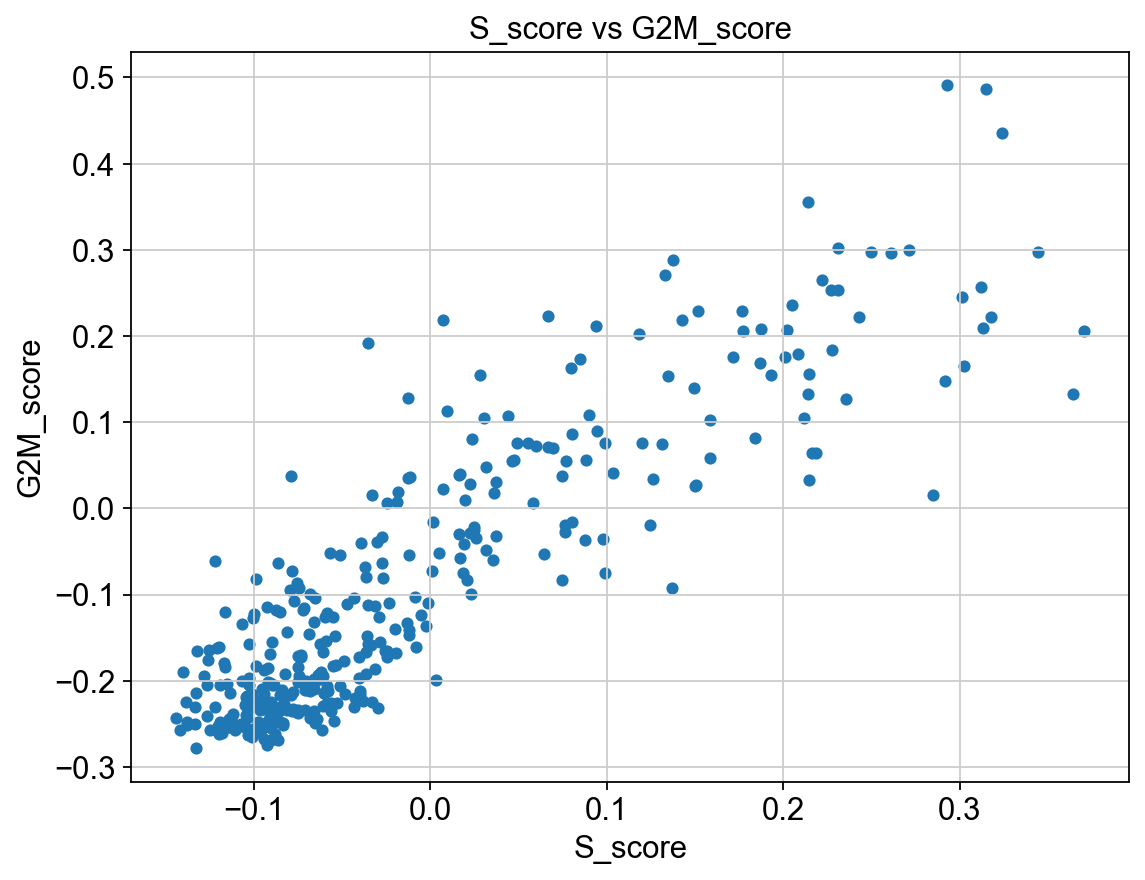

In [ ]:
# Select data
s_scores = pseudobulk.obs["S_score"]
g2m_scores = pseudobulk.obs["G2M_score"]

# Build the plot
plt.figure(figsize=(8, 6))
plt.scatter(s_scores, g2m_scores, s=20)
plt.title("S_score vs G2M_score")
plt.xlabel("S_score")
plt.ylabel("G2M_score")
plt.grid(True)
plt.show()

In [ ]:
sc.pp.pca(pseudobulk)
sc.pp.neighbors(pseudobulk)  # Compute neighbors graph
sc.tl.umap(pseudobulk)

computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:00)


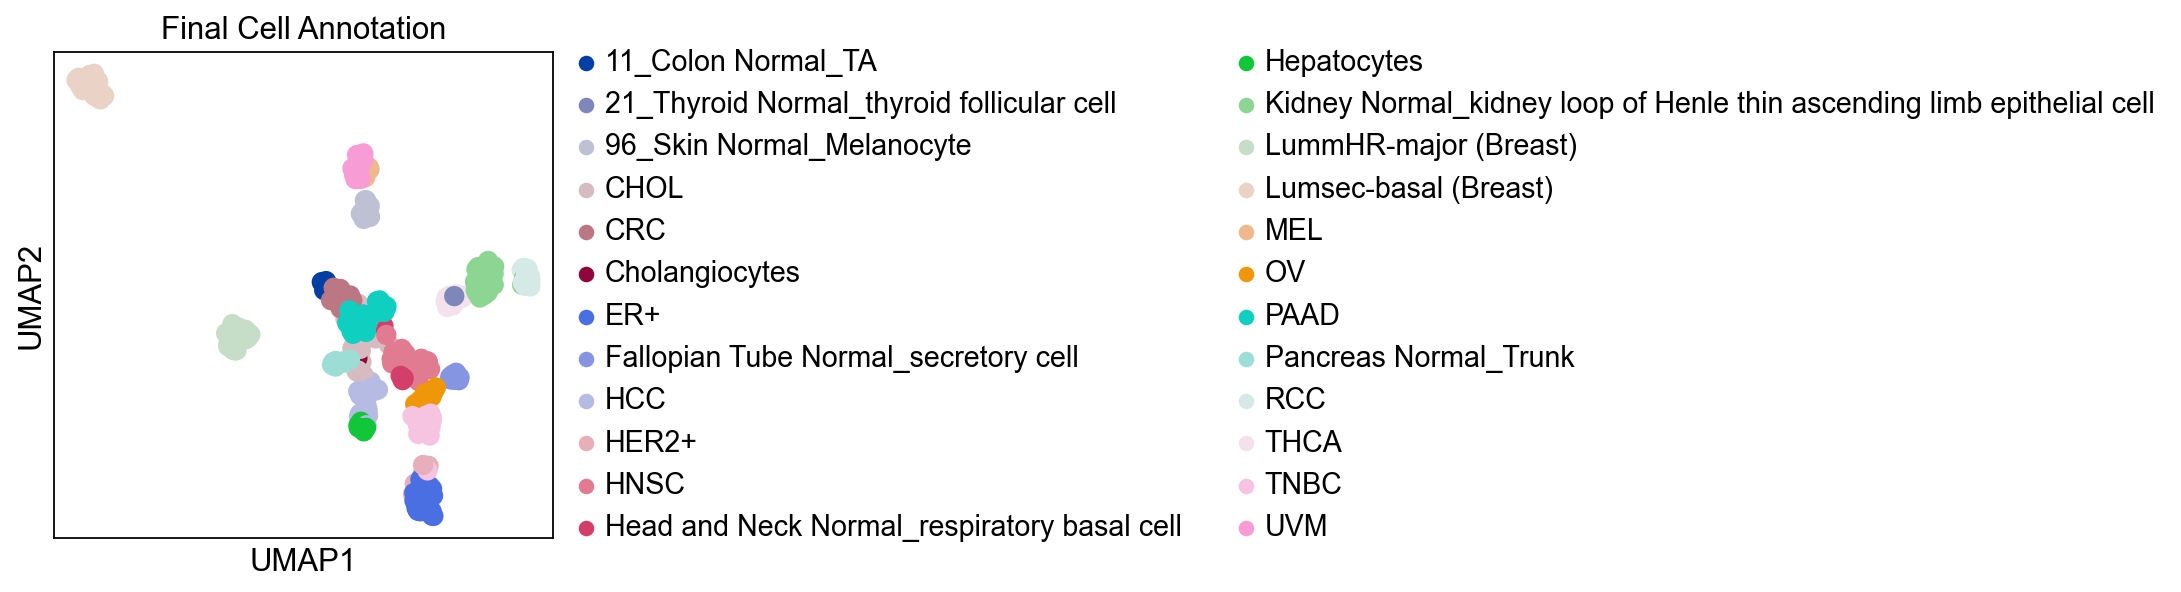

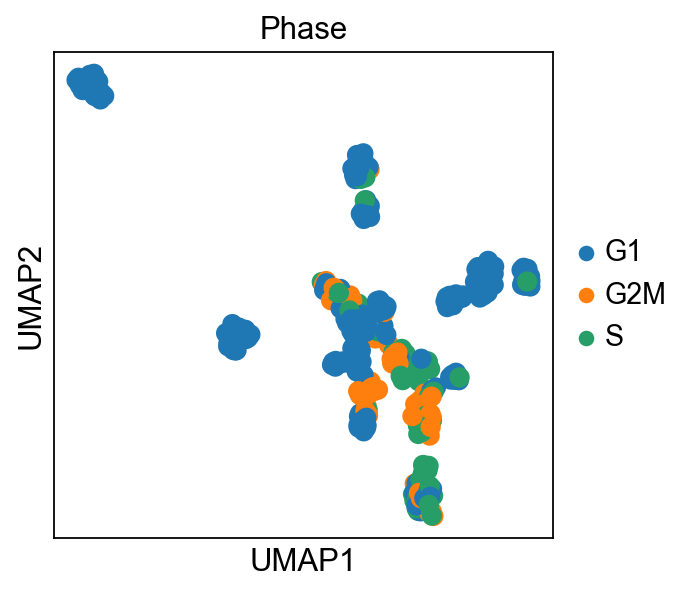

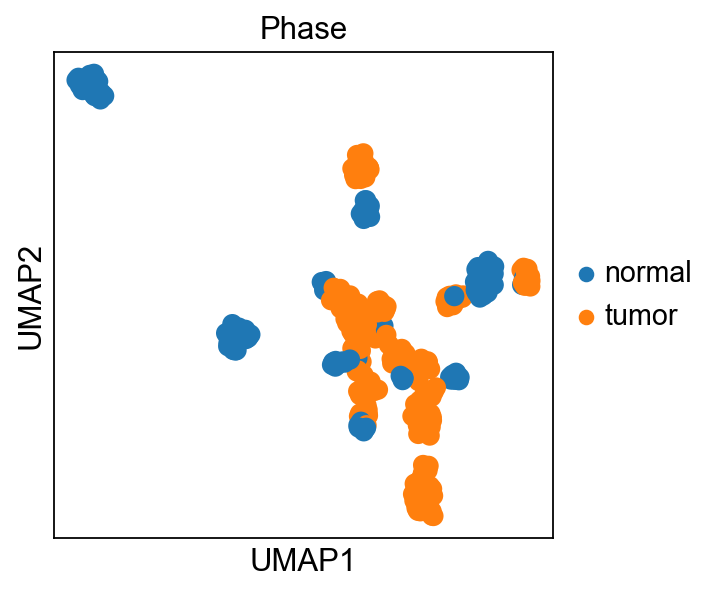

In [ ]:
sc.pl.umap(pseudobulk, color="final_cell_annotation", title="Final Cell Annotation")
sc.pl.umap(pseudobulk, color="phase", title="Phase")
sc.pl.umap(pseudobulk, color="cnv_status", title="Phase")

In [ ]:
import pandas as pd

cross_table = pd.crosstab(
    index=[pseudobulk.obs["final_cell_annotation"], pseudobulk.obs["cnv_status"]],
    columns=pseudobulk.obs["phase"],
)
print(cross_table)

phase                                                          G1  G2M   S
final_cell_annotation                              cnv_status             
11_Colon Normal_TA                                 normal       2    2   3
21_Thyroid Normal_thyroid follicular cell          normal       1    0   0
96_Skin Normal_Melanocyte                          normal      13    0   1
CHOL                                               tumor        9    2   3
CRC                                                tumor        4    7   2
Cholangiocytes                                     normal       2    0   1
ER+                                                tumor       10    7  11
Fallopian Tube Normal_secretory cell               normal       9    0   1
HCC                                                tumor        5   14   4
HER2+                                              tumor        2    1   5
HNSC                                               tumor        4    8  16
Head and Neck Normal_resp

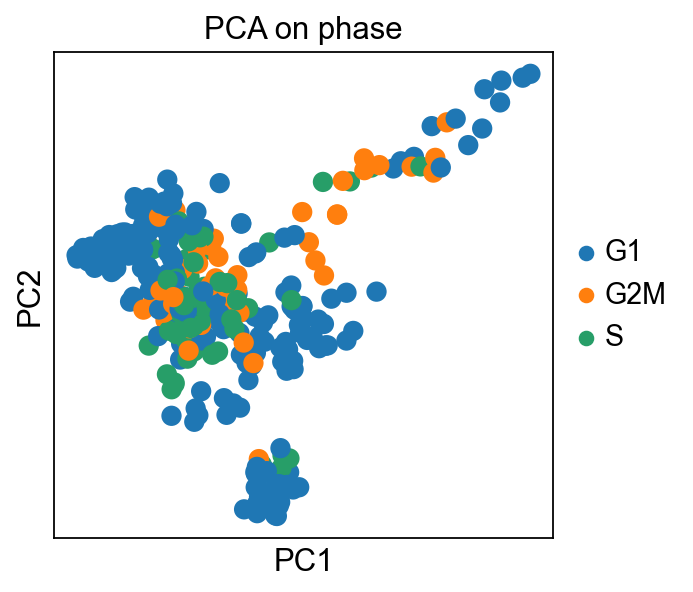

In [72]:
sc.pl.pca(pseudobulk, color="phase", title="PCA on phase")

In [ ]:
# Read the results of GSEA analysis
df = pd.read_csv(
    "/Users/lerastepanova/Documents/bioinf/Project_YUR/cell_gsea_result.csv",
    index_col=0,
)

In [ ]:
# Create the table with mean value
mean_table = df.groupby("Group")["prolifiration"].mean().reset_index()

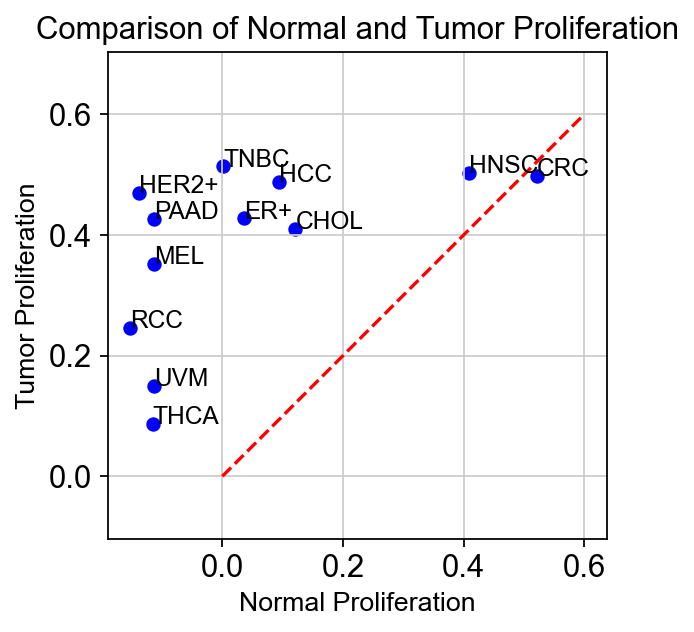

In [ ]:
import matplotlib.pyplot as plt

# Build the plot
plt.figure(figsize=(4, 4))
plt.scatter(
    df["prolifiration_normal"],
    df["prolifiration_tumor"],
    color="blue",
    s=30,
    label="Normal vs Tumor",
)

# Add the line y=x for comparison
plt.plot([0, 0.6], [0, 0.6], color="red", linestyle="--", label="y = x")


plt.xlabel("Normal Proliferation", fontsize=12)
plt.ylabel("Tumor Proliferation", fontsize=12)
plt.title("Comparison of Normal and Tumor Proliferation", fontsize=14)
plt.xlim(0, 0.6)
plt.ylim(0, 0.6)
plt.axis("equal")

for i, row in df.iterrows():
    plt.text(
        row["prolifiration_normal"],
        row["prolifiration_tumor"],
        row["tumor"],
        fontsize=11,
    )


plt.show()